Group Member: Raye Shen, Peng Sun, Pooja Swamy

# Introduction

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world. 


The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city.


In this problem, we are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. We are then asked to predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.


This problem is of particular interest in various civic and logistical applications, as predicting the demand accurately can lead to better traffic management, appropriate logistical support for the bike sharing services and other areas as well.

Our project will show the whole prediction process from: **Purpose and Motivation, Data Manipulation, Model Fitting, Statistical Summary and Further Improvement**

# Purpose and Motivation

The motivation of this project is to predict the usage of sharing bikes by using different regression models and choose the best model with the lowest Root Mean Squared Logarithmic Error (RMSLE). 

The dataset was provided by Hadi Fanaee Tork using data from Capital Bikeshare. It is hosted on UCI, and is accessible at http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

**A SHORT DESCRIPTION OF THE FEATURES.**

We are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

**Approach to the project**:

We started with the analysis of the regressors that affect a bike sharing system. Since this is a regression problem the first model we tried is a multiple linear regression model. Then we moved to more complex non-parametric approaches like random forest which can handle data of mixed type and are robust to outliers unlike a simple regression model. 

To improve the fitting results further we can use regularization models (e.g. Lasso and Ridge models for linear regression) or tune parameters.

In [4]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style


#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
 



# Data Manipulation

In [5]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Getting the data:
train_df = pd.read_csv('D:/data/AAMSFE/7773 ML/Final/train.csv')
test_df = pd.read_csv('D:/data/AAMSFE/7773 ML/Final/test.csv')
test_df_origin = test_df.copy()
# Data Exploration:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


From above we can see that:

**For the training set:**

Total 10886 samples with 12 columns, **count** is dependent varibale and the others are explanatory variables

**datetime** is an object, including date, hour, weekday, month

**contegorical features** are **season**, **holiday**,**workingday** and **weather**

**numerical features** are: **temp, atemp, humidity, windspeed, casual, registered**

**For the test set:**

Total 6493 samples with 9 columns, we will use these columns to make predictions

## Distributions for numeric and categorical variables:

In [7]:
# Distribution for numeric variables:
numeric_df = train_df[['temp','atemp','humidity','windspeed','casual','registered']]
numeric_df.describe()

,temp,atemp,humidity,windspeed,casual,registered
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000


From the chart above, we can see that Casual and Registered have a boarder range, which means that these two features have a higher variance

In [8]:
# Distribution for categorical variables:
categorical_df = train_df[['season','holiday','workingday','weather']]
print(categorical_df.groupby(['season']).size())
print(categorical_df.groupby(['holiday']).size())
print(categorical_df.groupby(['workingday']).size())
print(categorical_df.groupby(['weather']).size())

season
1    2686
2    2733
3    2733
4    2734
dtype: int64
holiday
0    10575
1      311
dtype: int64
workingday
0    3474
1    7412
dtype: int64
weather
1    7192
2    2834
3     859
4       1
dtype: int64


Above output shows that how categorical variables are distributed, with the number of variables located in each category. In the following part the visualization of dataset distribution will be present in our project.

## Visualize Distribution of Data

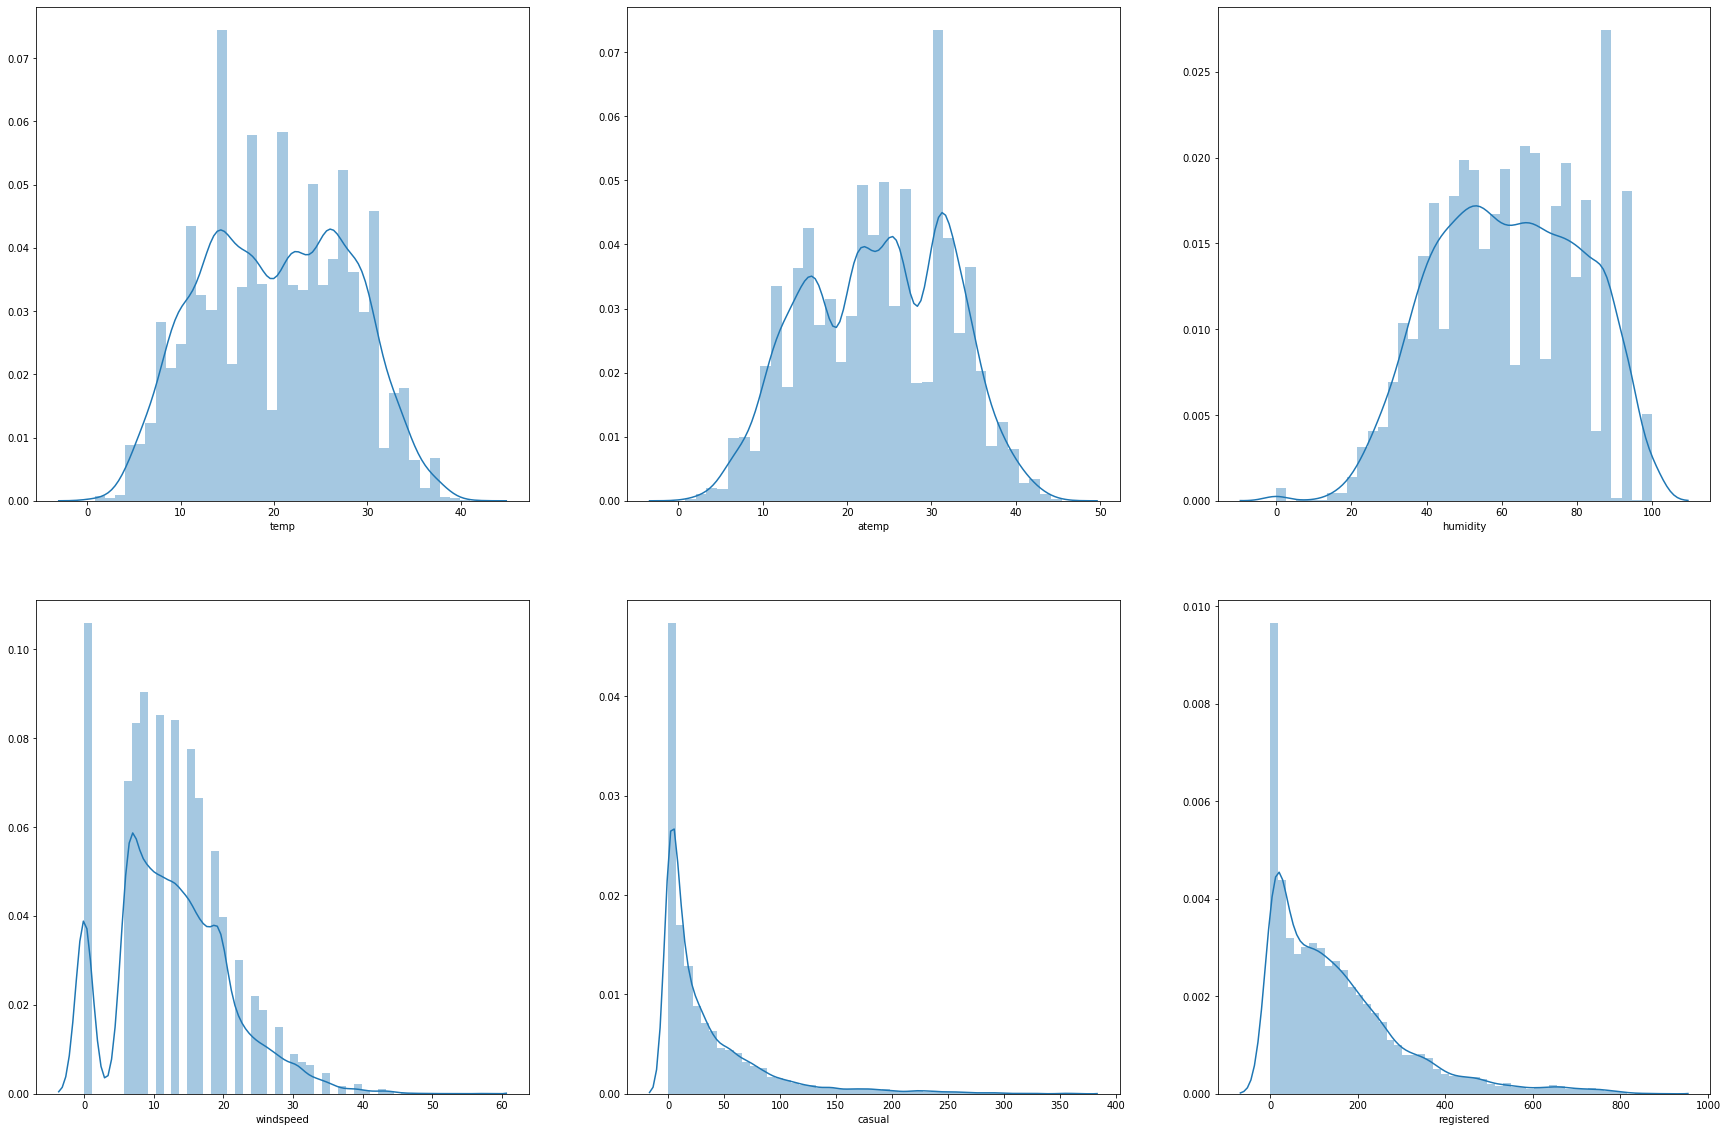

In [9]:
# Visualize all continuous variables:
fig,axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(30, 20)
sns.distplot(train_df['temp'], ax=axes[0][0])
sns.distplot(train_df['atemp'],ax=axes[0][1])
sns.distplot(train_df['humidity'], ax=axes[0][2])
sns.distplot(train_df['windspeed'], ax=axes[1][0])
sns.distplot(train_df['casual'], ax=axes[1][1])
sns.distplot(train_df['registered'], ax=axes[1][2])

Temp, atemp and humidity are kind of distributed symmetically. Windspeed, casual and registered variables show skewed disribution

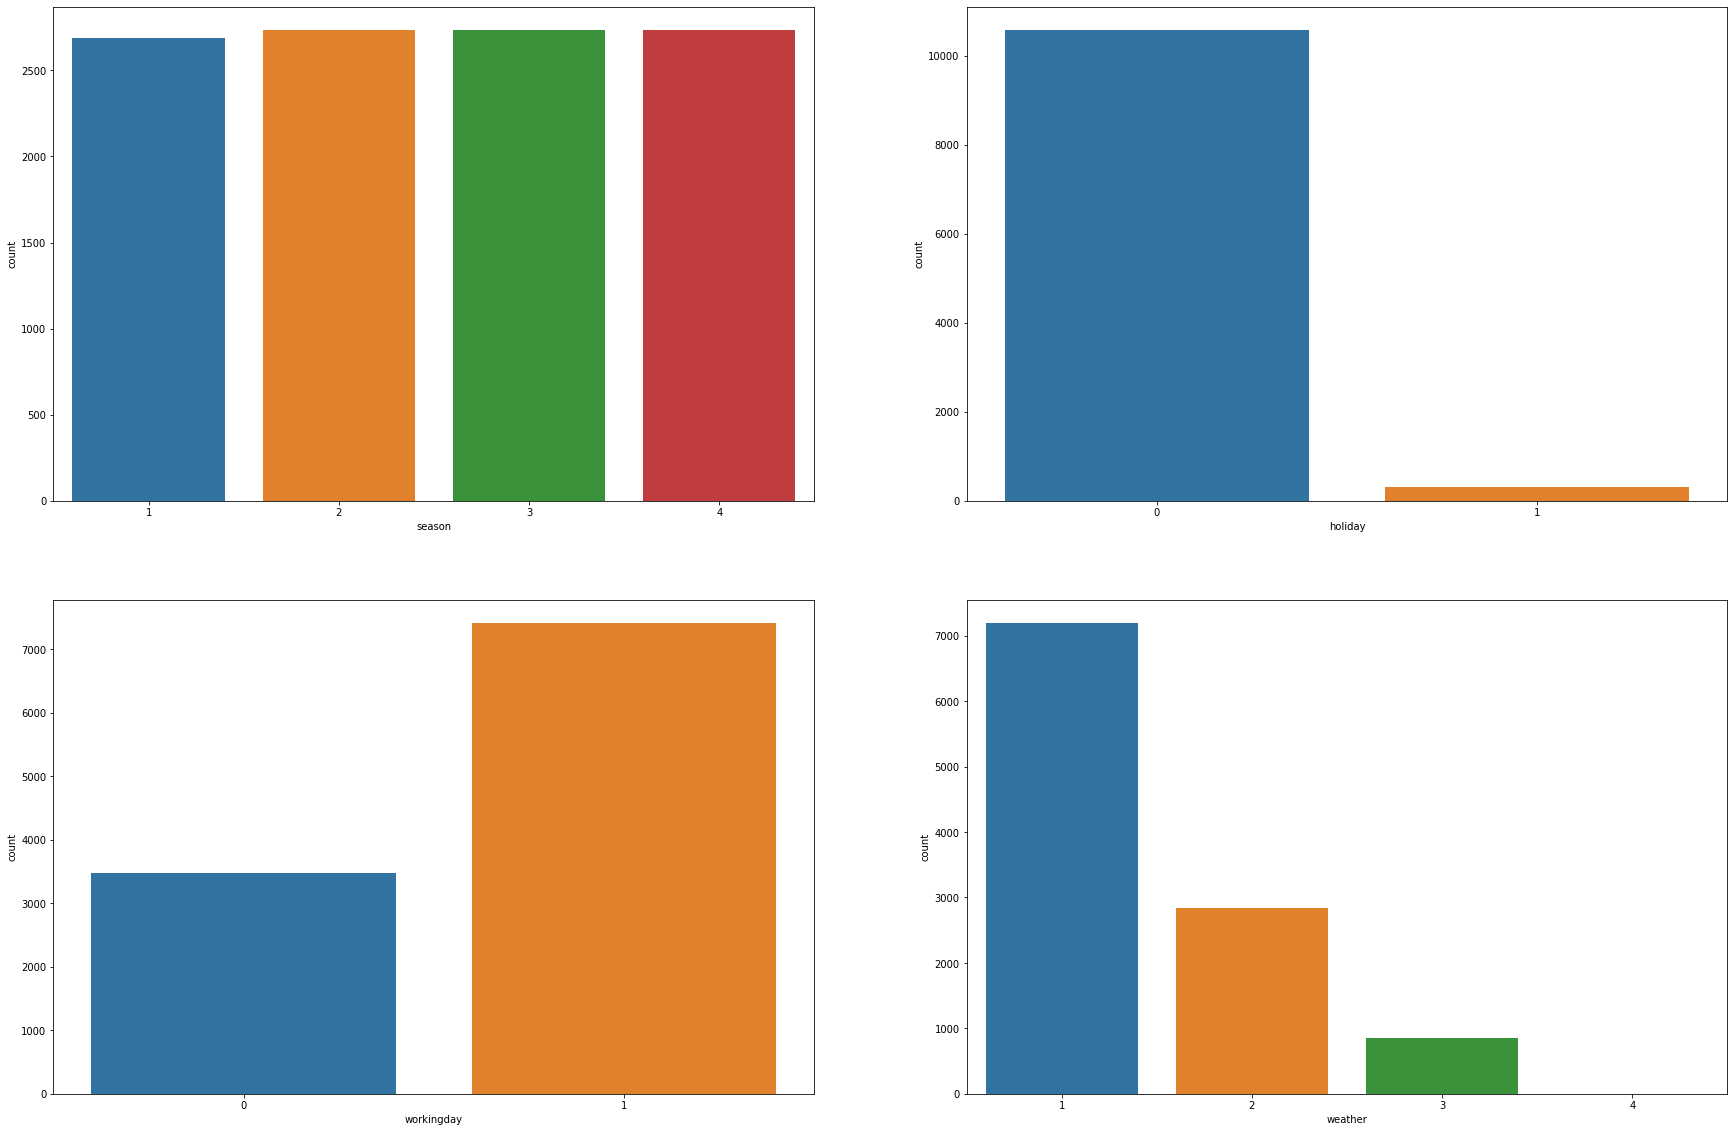

In [10]:
# Visualize categorical variables:
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(30, 20)
sns.countplot(x='season', data=train_df,ax=axes[0][0])
sns.countplot(x='holiday', data=train_df,ax=axes[0][1])
sns.countplot(x='workingday', data=train_df,ax=axes[1][0])
sns.countplot(x='weather', data=train_df,ax=axes[1][1])

From the chart above, we can see that the number of the four different seasons is evenly distributed. As for holiday and workingday, the number of holiday is much larger in holiday than in workingday. Lastly, the count is largest in clear and cloud weather, followed by mist, snow and heavy rain weather

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

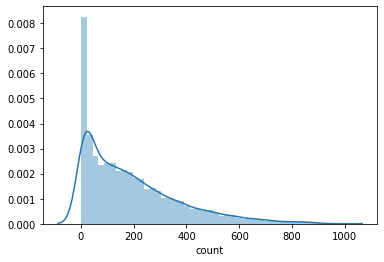

In [11]:
#Dependent variable analysis
sns.distplot(train_df["count"])
train_df["count"].describe()

As for the dependent variable "count", it is a right-skewed distrubution. About half of rentals are around 0-200. 

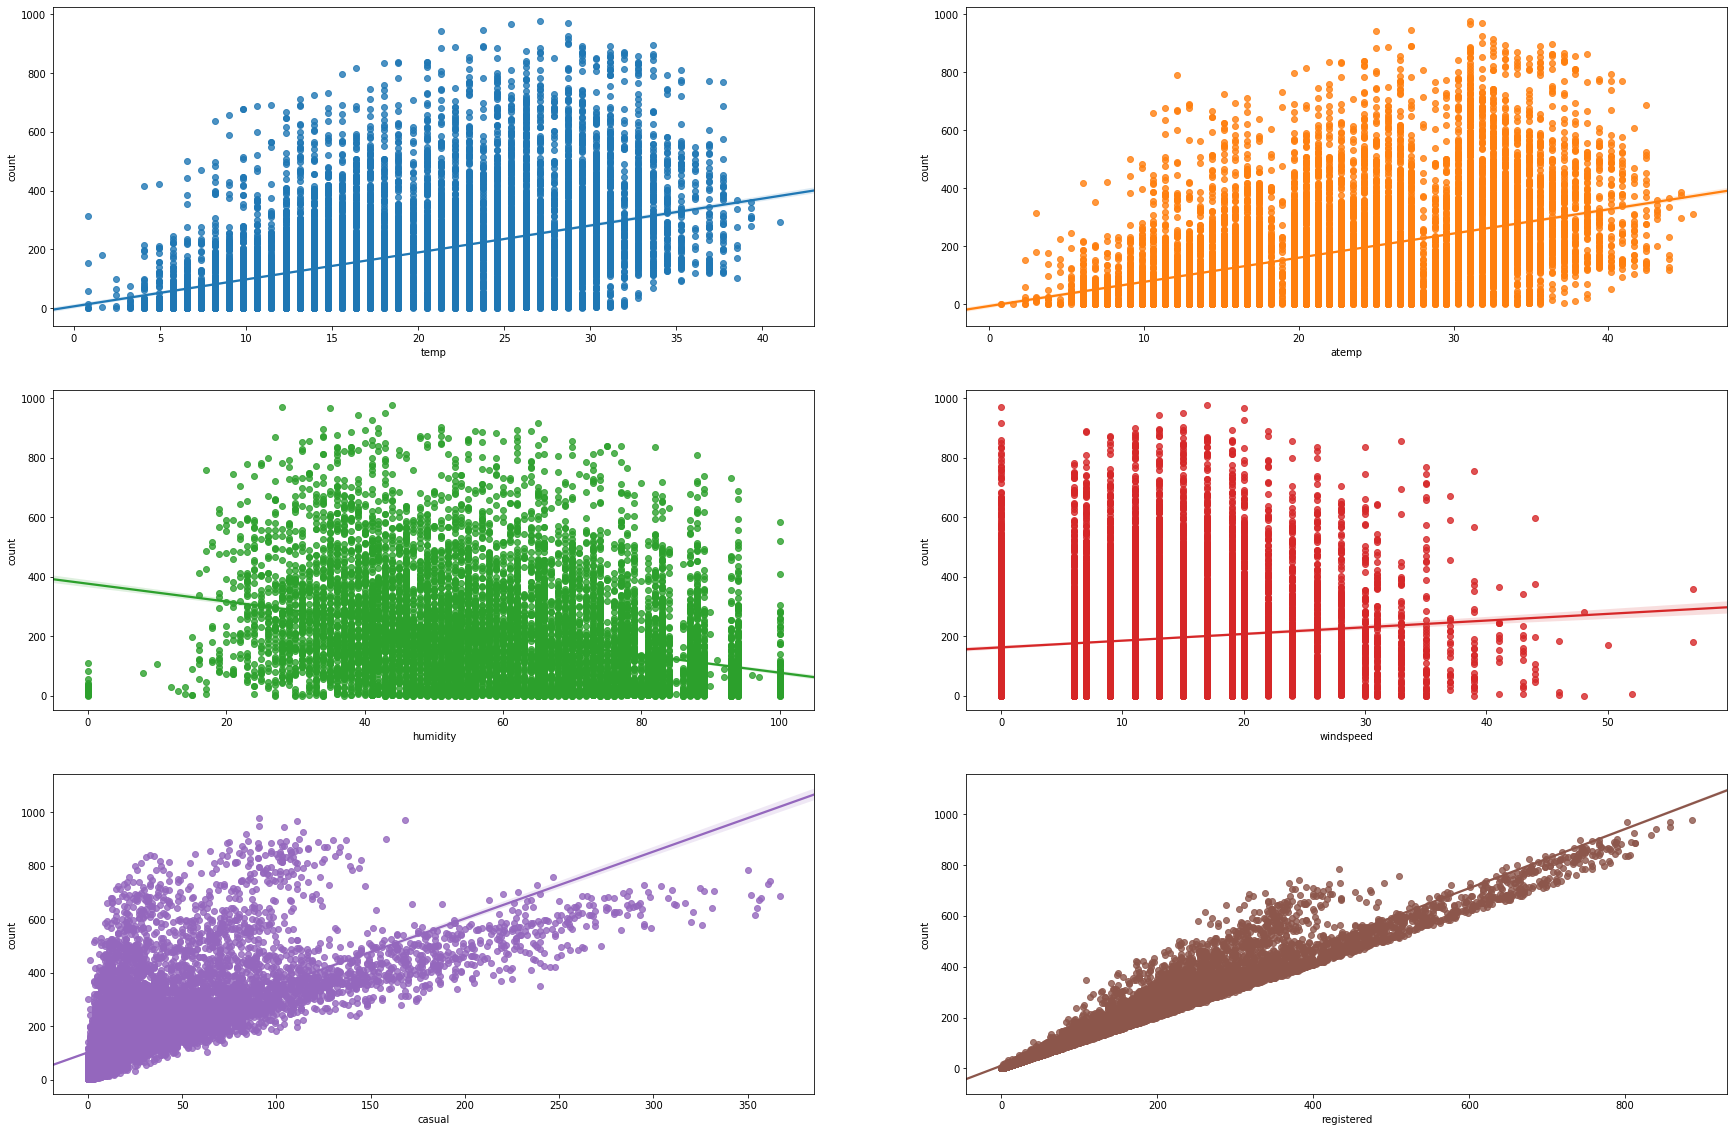

In [12]:
# Visualize Count v.s. all continuous variables:
fig,axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(30, 20)
sns.regplot(x="temp", y="count", data=train_df,ax=axes[0][0])
sns.regplot(x="atemp", y="count", data=train_df,ax=axes[0][1])
sns.regplot(x="humidity", y="count", data=train_df,ax=axes[1][0])
sns.regplot(x="windspeed", y="count", data=train_df,ax=axes[1][1])
sns.regplot(x="casual", y="count", data=train_df,ax=axes[2][0])
sns.regplot(x="registered", y="count", data=train_df,ax=axes[2][1])

Temp and atemp affect the count. Usually, there are less rentals when temperature is low.
Humdity affects negatively the count, which makes sense.
Windspeed affects the count, but the relation needs more investigation. 
Casual and registered seem to affect the count positively.  

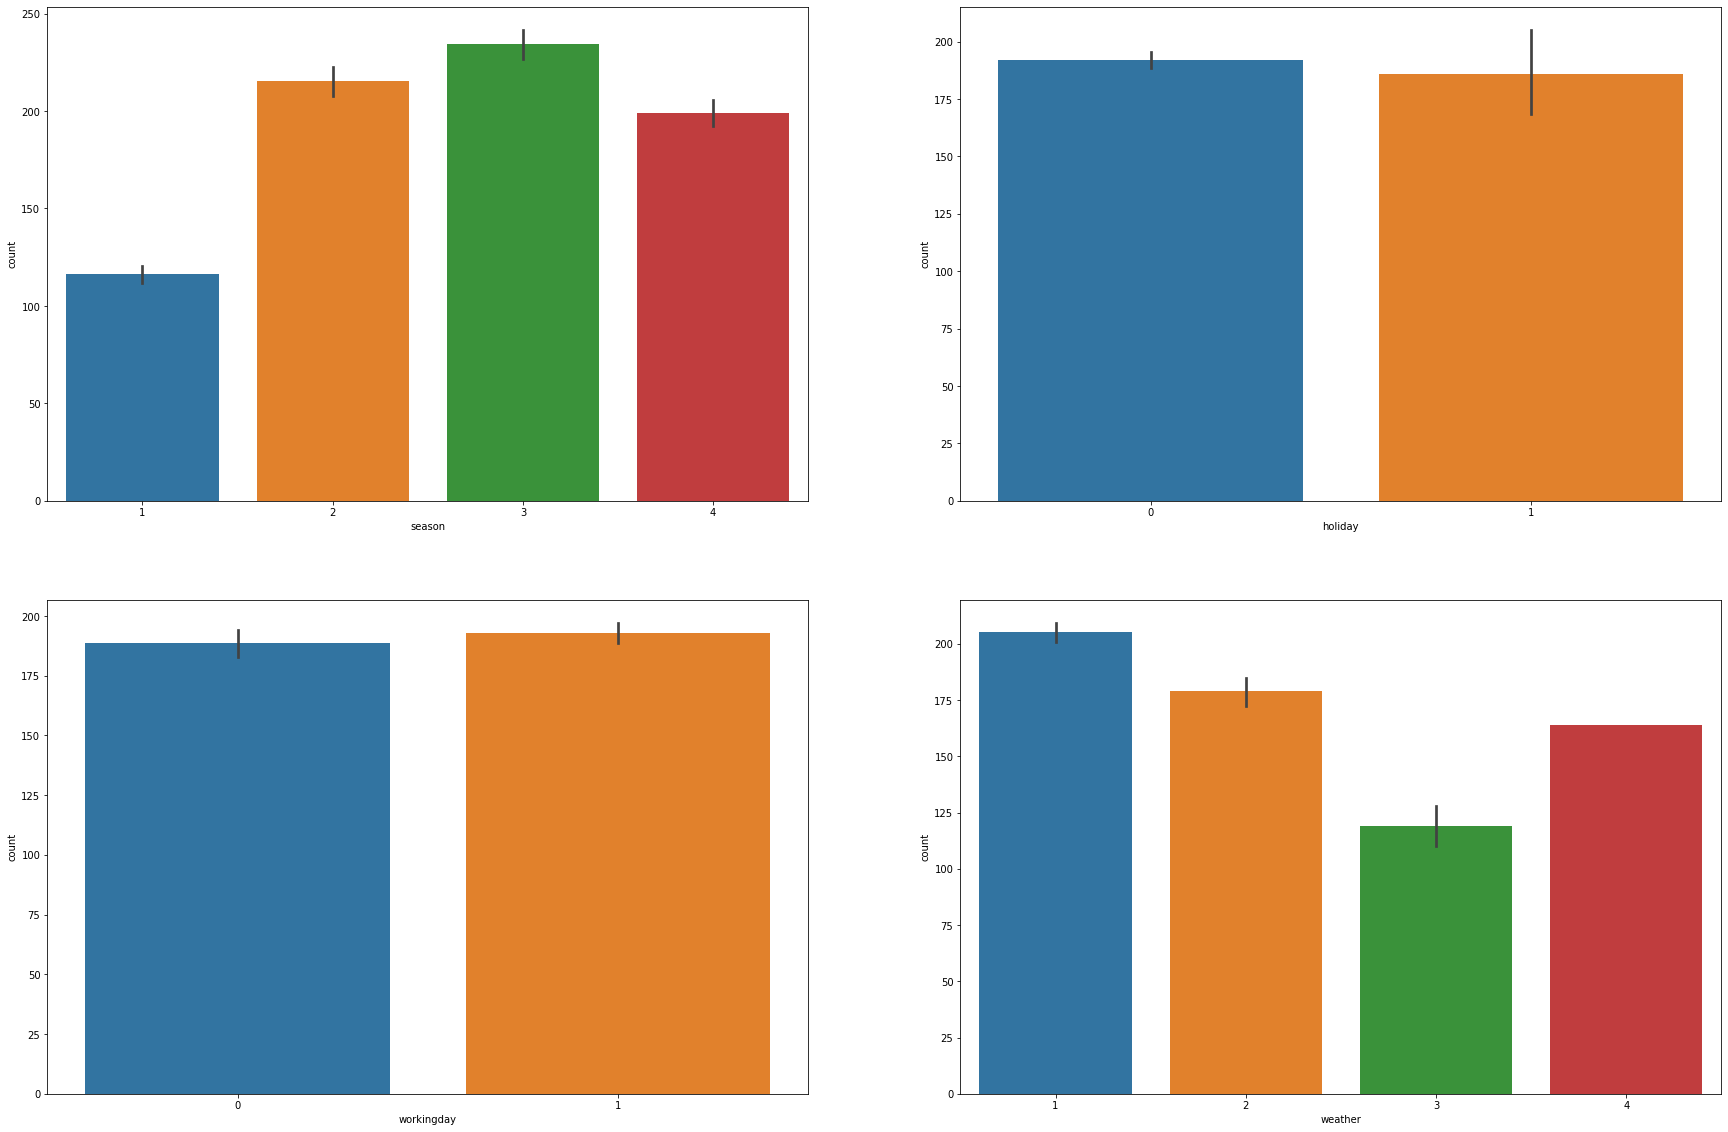

In [13]:
# Visualize Count v.s. all categorical variables:
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(30, 20)
sns.barplot(x='season', y='count', data=train_df,ax=axes[0][0])
sns.barplot(x='holiday', y='count', data=train_df,ax=axes[0][1])
sns.barplot(x='workingday', y='count', data=train_df,ax=axes[1][0])
sns.barplot(x='weather', y='count', data=train_df,ax=axes[1][1])

Season affects the count greatly; normally more rentals in summer and fall.

Holiday seems to affect the count, there are slightly more rentals on non-holidays.

Workingday seems to affect the count, there are slightly more rentals on workingdays.

Weather affects the count greatly; normally more rentals on nice weather conditions. 

Next, we are going to do some Correlation Analysis regarding to all the variables.


## Correlation Analysis:

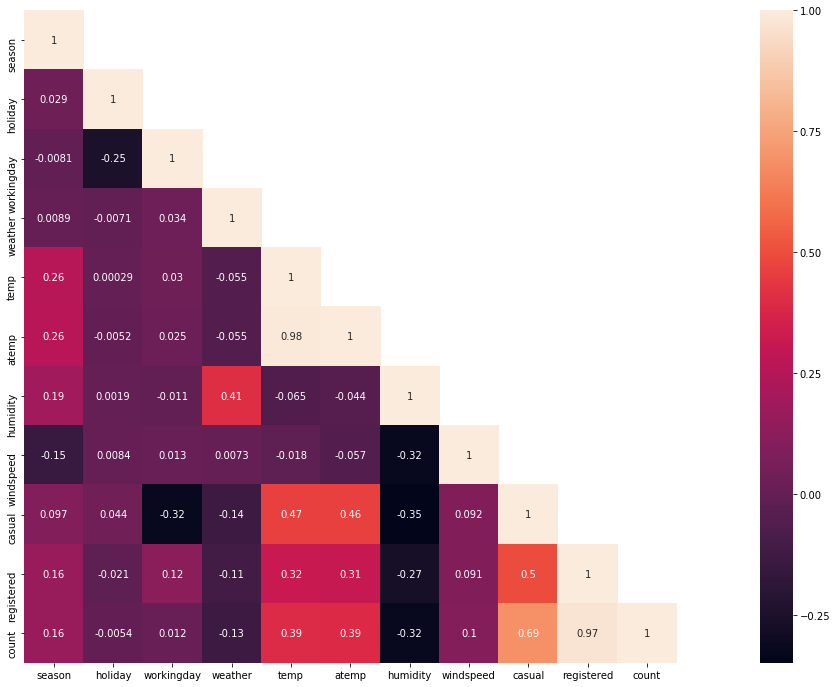

In [14]:
#corelation matrix.
cor_mat= train_df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

1. "temp" and "atemp" are highly related as expected, "atemp" is variable is not taken into the model building since "atemp" and "temp" has got strong correlation with each other. Any one of the variable has to be dropped since they will exhibit multicollinearity in the data.

2. "Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building.
(We can have data such as temp, weather etc, but it is impossible to have the number of casual/registered because this is what we are trying to predict)

3. humidity is inversely related to count as expected, when weather is humid people will not like to travel on a bike

4. Windspeed and count are positively related but this relation is weak. 

5. Season and count are positively related. As season increases from 1 to 4, we can see more rentals from spring to fall.

6. Weather and count are inversely related. As weather increases from 1 to 4, weather is getting worese and there are less rentals.

7. Holiday and count are inversely related. People tend to rent bikes on non-holidays. Still, this relation is quite weak. 

8. Workingday and count are positively related. People tend to rent bikes on workingdays. Still, this relation is quite weak. 

## Missing Value:
First, we need to check if there is any missing value in the dataset:

In [15]:
# Check missing values:
total = train_df.isnull().sum()
total2 = test_df.isnull().sum()
missing_data = pd.concat([total, total2], axis=1, keys=['train', 'test'])
missing_data

,train,test
atemp,0,0.0
casual,0,NaN
count,0,NaN
datetime,0,0.0
holiday,0,0.0
humidity,0,0.0
registered,0,NaN
season,0,0.0
temp,0,0.0
weather,0,0.0


From the chart above, we can see that there is no missing value in this dataset, for both training and test sets.

## Features transformation:

In [16]:
# Add new columns
data = [train_df, test_df]
for dataset in data:
    dataset["hour"] = [t.hour for t in pd.DatetimeIndex(dataset.datetime)]
    dataset["day"] = [t.dayofweek for t in pd.DatetimeIndex(dataset.datetime)]
    dataset["month"] = [t.month for t in pd.DatetimeIndex(dataset.datetime)]
    dataset['year'] = [t.year for t in pd.DatetimeIndex(dataset.datetime)]
    dataset['year'] = dataset['year'].map({2011:0, 2012:1})

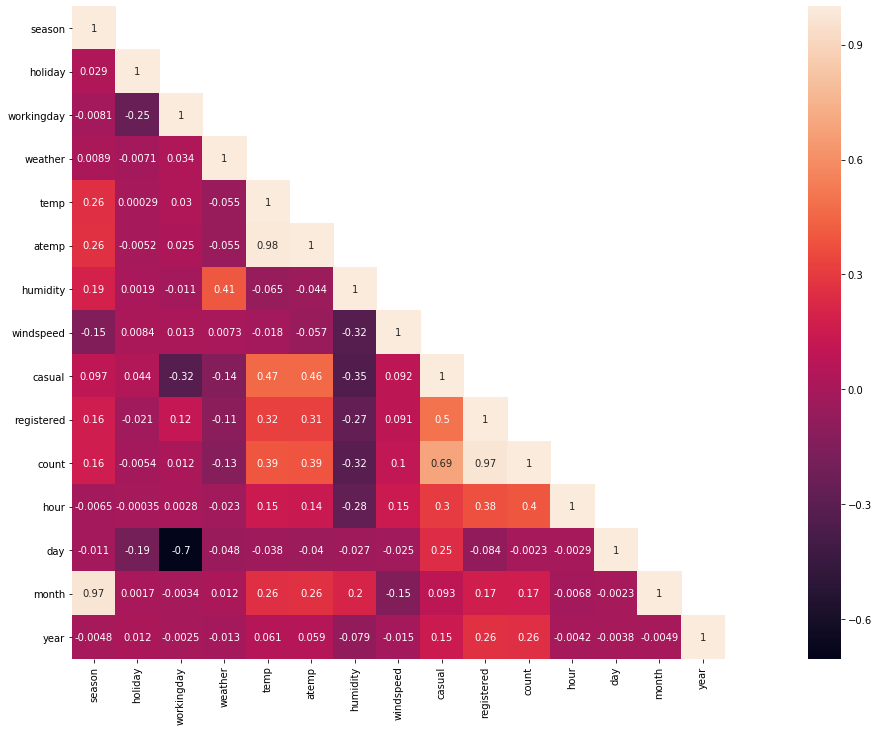

In [17]:
#corelation matrix.
cor_mat= train_df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [18]:
# Drop the datetime column:
train_df = train_df.drop(['datetime'], axis=1)
test_df = test_df.drop(['datetime'], axis=1)

In [19]:
# Since there is no casual and registered columns in test dataset, we need to drop
train_df.drop(['casual','registered'],axis=1,inplace = True)

In [20]:
# For Season and Weather, convert them into dummy variables:
season=pd.get_dummies(train_df['season'],prefix='season')
train_df=pd.concat([train_df,season],axis=1)

season=pd.get_dummies(test_df['season'],prefix='season')
test_df=pd.concat([test_df,season],axis=1)


weather=pd.get_dummies(train_df['weather'],prefix='weather')
train_df=pd.concat([train_df,weather],axis=1)

weather=pd.get_dummies(test_df['weather'],prefix='weather')
test_df=pd.concat([test_df,weather],axis=1)


In [21]:
# Now drop weather and season columns:
train_df.drop(['season','weather'],inplace=True,axis=1)
test_df.drop(['season','weather'],inplace=True,axis=1)
# Drop "atemp" column because it is highly correlated to "temp" feature:
train_df.drop(['atemp'],inplace=True,axis=1)
test_df.drop(['atemp'],inplace=True,axis=1)

In [22]:
train_df.head()

,holiday,workingday,temp,humidity,windspeed,count,hour,day,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,81,0.0,16,0,5,1,0,1,0,0,0,1,0,0,0
1,0,0,9.02,80,0.0,40,1,5,1,0,1,0,0,0,1,0,0,0
2,0,0,9.02,80,0.0,32,2,5,1,0,1,0,0,0,1,0,0,0
3,0,0,9.84,75,0.0,13,3,5,1,0,1,0,0,0,1,0,0,0
4,0,0,9.84,75,0.0,1,4,5,1,0,1,0,0,0,1,0,0,0


In [23]:
test_df.head()

,holiday,workingday,temp,humidity,windspeed,hour,day,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,1,10.66,56,26.0027,0,3,1,0,1,0,0,0,1,0,0,0
1,0,1,10.66,56,0.0000,1,3,1,0,1,0,0,0,1,0,0,0
2,0,1,10.66,56,0.0000,2,3,1,0,1,0,0,0,1,0,0,0
3,0,1,10.66,56,11.0014,3,3,1,0,1,0,0,0,1,0,0,0
4,0,1,10.66,56,11.0014,4,3,1,0,1,0,0,0,1,0,0,0


## Visualization of Time Variables(including hour, day, month, year)

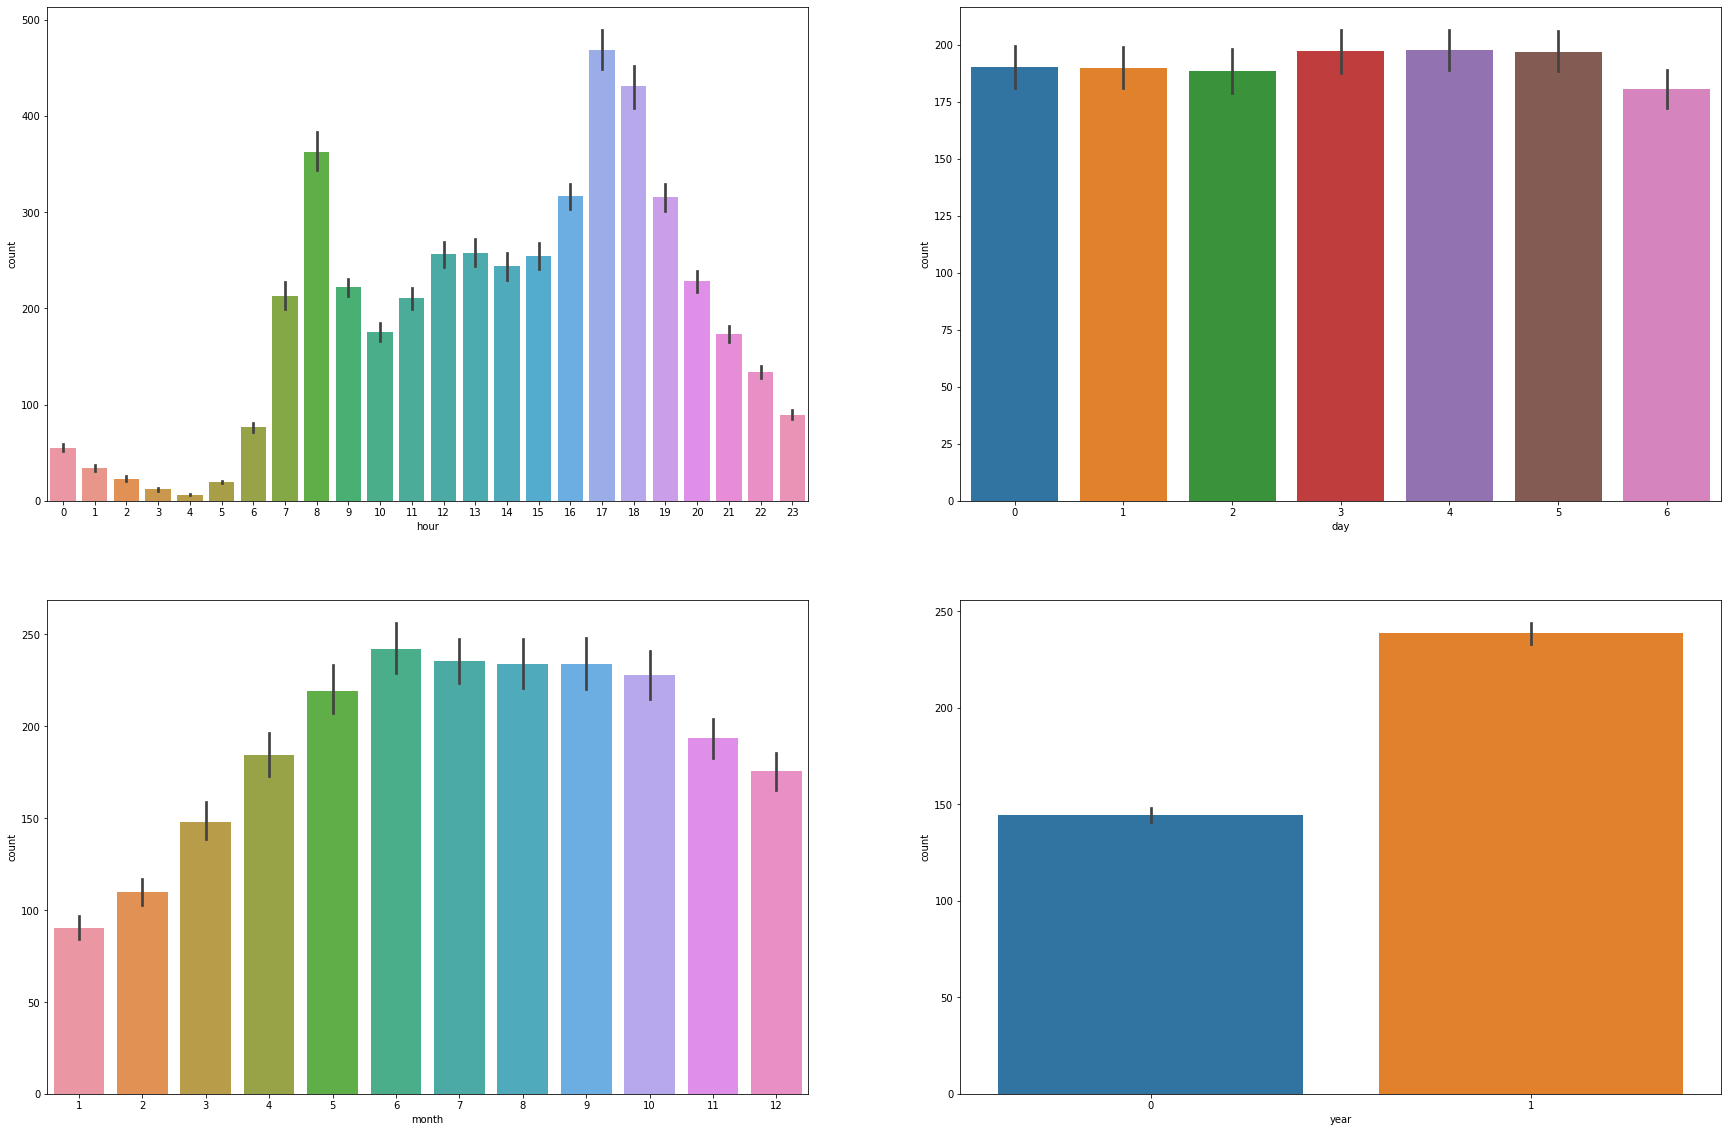

In [24]:
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(30, 20)
sns.barplot(x='hour', y='count', data=train_df, ax=axes[0][0])
sns.barplot(x ='day', y='count', data=train_df,ax=axes[0][1])
sns.barplot(x ='month', y='count', data=train_df,ax=axes[1][0])
sns.barplot(x ='year', y='count', data=train_df, ax=axes[1][1])

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

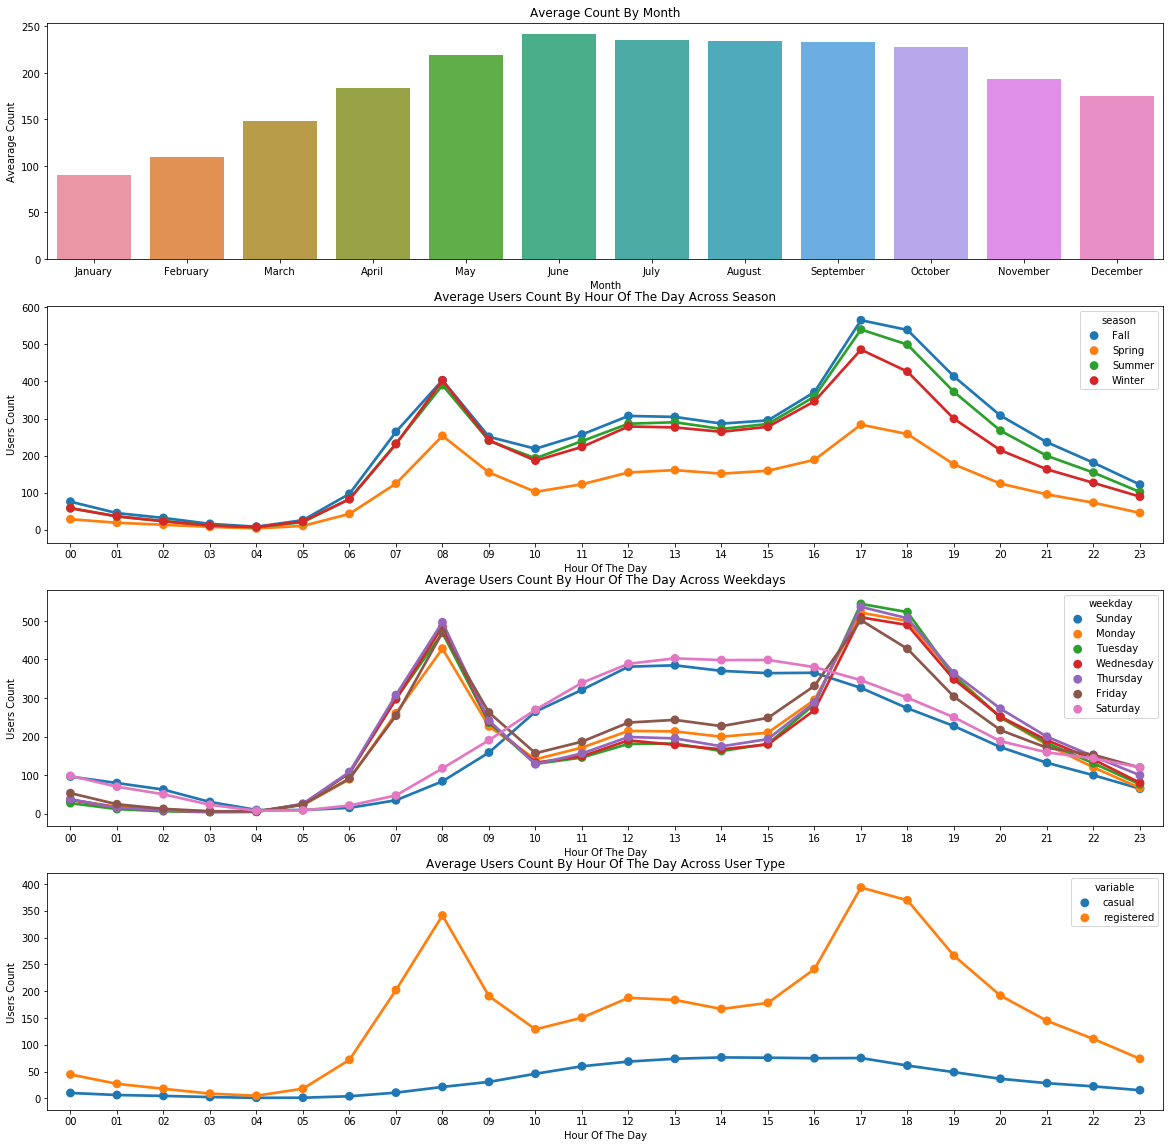

In [25]:
import seaborn as sn
dailyData = pd.read_csv('D:/data/AAMSFE/7773 ML/Final/train.csv')
dailyData["date"] = dailyData.datetime.apply(lambda x : x.split()[0])
dailyData["hour"] = dailyData.datetime.apply(lambda x : x.split()[1].split(":")[0])
dailyData["weekday"] = dailyData.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
dailyData["month"] = dailyData.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
dailyData["season"] = dailyData.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
dailyData["weather"] = dailyData.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })


categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    dailyData[var] = dailyData[var].astype("category")
    
    

dailyData  = dailyData.drop(["datetime"],axis=1)

fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(20,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(dailyData.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=monthSorted,x="month",y="count",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(dailyData.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(dailyData.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(dailyData[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

It is quiet obvious that people tend to rent bike during summer season since it is really conducive to ride bike at that season.Therefore June, July and August has got relatively higher demand for bicycle.
On weekdays more people tend to rent bicycle around 7AM-8AM and 5PM-6PM. This can be attributed to regular school and office commuters.
Above pattern is not observed on "Saturday" and "Sunday".More people tend to rent bicycle between 10AM and 4PM.
The peak user count around 7AM-8AM and 5PM-6PM is purely contributed by registered user.

Next, we move to the second part: Different regression model fitting and find the best model for prediction by comparing the RMSLE value.

# Model Fitting: 

In the model fitting part, we are going to use different regression models including **KNN, Random Forest, Support Vector Regression, AdaBoost, Bagging Regression, Gradient Boosting, Linear Regression with regularization** models to fit the data and compare the RMSLE values. Also, Tune hyperparameters will be introduced during the model fitting process.

As for the training set data, we are going to split it into train and validate set in order to do the error analysis for each model, with 80% train data and 20% validate data. The following code shows the shape of train and validate dataset.

The formula for RMSLE value:

$$ RMSLE = \sqrt{\frac{1}{n} \sum_{i=1}^n (log(p_i+1) - log(a_i+1))^2 } $$

Since all the predicted "count" values are expected to be greater than 0, we need to test if $p_i + 1> 0$ or not to make the $log(p_i+1)$ be defined. When calculating the lowest Root Mean Squared Logarithmic Error (RMSLE) for each model, Gradient Boosting and Linear models perform negative values. However, the purpose of our project is to see if the overall performance is good or not, we are going to tansform all the NA values to 0 during the process of calculating RMSLE. That can be a point needs futher consideration.

In [26]:
X_train_df = train_df.drop(["count"], axis=1)
Y_train_df = train_df["count"]
X_test_df  = test_df.copy()
X_train_df.shape, Y_train_df.shape, X_test_df.shape

((10886, 17), (10886,), (6493, 17))

In [27]:
# Train and Validate split:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train_df, Y_train_df,
                                                           test_size = 0.25,
                                                           random_state = 64)

In [28]:
X_train.shape, Y_train.shape, X_validate.shape, Y_validate.shape

((8164, 17), (8164,), (2722, 17), (2722,))

## KNN Model:

In [29]:
# Initialize KNN model:
KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)
# KNN model prediction on validate set:
Y_validate_pred_KNN = KNN.predict(X_validate)
a=Y_validate_pred_KNN+1
print(all(a>0))
# KNN model RMSLE:
RMSLE_KNN=np.sqrt(mean_squared_log_error(Y_validate,Y_validate_pred_KNN))
# KNN model prediction on test set:
Y_test_pred_KNN = KNN.predict(X_test_df)
print("RMSLE value for KNN regression: ", RMSLE_KNN)

True
RMSLE value for KNN regression:  0.8587088081234769


## Random Forest Model:

In [62]:
# Initialize random forest model:
RF = RandomForestRegressor( random_state = 64)
RF.fit(X_train,Y_train)
# Random forest model prediction on validation set:
Y_validate_pred_RF = RF.predict(X_validate)
# Random Forest model RMSLE:
b=Y_validate_pred_RF+1
print(all(b>0))
RMSLE_RF=np.sqrt(mean_squared_log_error(Y_validate,Y_validate_pred_RF))
# RF model prediction on test set:
Y_test_pred_RF = RF.predict(X_test_df)
print("RMSLE value for Random Forest regression: ", RMSLE_RF)

True
RMSLE value for Random Forest regression:  0.34729261313540954


## Support Vector Regression

In [31]:
# Initialize  Support Vector Regression model:
SV =SVR()
SV.fit(X_train,Y_train)
# SVR model prediction on validate set:
Y_validate_pred_SV = SV.predict(X_validate)
d=Y_validate_pred_SV+1
print(all(d>0))
# SVR model RMSLE:
RMSLE_SV=np.sqrt(mean_squared_log_error(Y_validate,Y_validate_pred_SV))
# SVR model prediction on test set:
Y_test_pred_SV = SV.predict(X_test_df)
print("RMSLE value for Support Vector regression: ", RMSLE_SV)

True
RMSLE value for Support Vector regression:  1.4438363292258964


## AdaBoost Regression

In [32]:
# Initialize AdaBoost Regression model:
ADB =AdaBoostRegressor()
ADB.fit(X_train,Y_train)
# AdaBoostRegressor model prediction on validate set:
Y_validate_pred_ADB = ADB.predict(X_validate)
e=Y_validate_pred_ADB+1
print(all(e>0))
# AdaBoost Regression model RMSLE:
RMSLE_ADB=np.sqrt(mean_squared_log_error(Y_validate,Y_validate_pred_ADB))
# AdaBoost Regression model prediction on test set:
Y_test_pred_ADB = ADB.predict(X_test_df)
print("RMSLE value for AdaBoost regression: ", RMSLE_ADB)

True
RMSLE value for AdaBoost regression:  1.0637150144415282


## Bagging Regression

In [61]:
# Initialize Bagging Regression model:
BAG =BaggingRegressor( random_state = 64)
BAG.fit(X_train,Y_train)
# Bagging Regression model prediction on validate set:
Y_validate_pred_BAG = BAG.predict(X_validate)
f=Y_validate_pred_BAG+1
print(all(f>0))
# Bagging Regression model RMSLE:
RMSLE_BAG=np.sqrt(mean_squared_log_error(Y_validate,Y_validate_pred_BAG))
# Bagging Regression model prediction on test set:
Y_test_pred_BAG = BAG.predict(X_test_df)
print("RMSLE value for Bagging regression: ", RMSLE_BAG)

True
RMSLE value for Bagging regression:  0.3477939972162148


## Gradient Boosting

In [41]:
# Initialize Gradient Boosting model:
GB = GradientBoostingRegressor()
GB.fit(X_train,Y_train)
# Gradient Boosting model prediction on validate set:
Y_validate_pred_GB = GB.predict(X_validate)
g=Y_validate_pred_GB+1
print(all(g>0))
# Since there are negative values, we are going to change the way of calculating RMSLE, replacing NAN with 0
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))
gbm = GradientBoostingRegressor() 
gbm.fit(X = X_train,y = np.log1p(Y_train))
Y_validate_pred_gbm = gbm.predict(X= X_validate)
# Gradient Boosting Regression model RMSLE:
RMSLE_gbm = rmsle(np.exp(np.log1p(Y_validate)),np.exp(Y_validate_pred_gbm), False)
print ("RMSLE Value For Gradient Boost: ",RMSLE_gbm)
# Gradient Boosting regression model prediction on test set:
Y_test_pred_gbm = gbm.predict(X_test_df)

False
RMSLE Value For Gradient Boost:  0.38529580726540574


Now, we will dig into the Gradient Boosting, Random Forest model and Bagging regression models and see how this can improve the model. 

### Tune Parameters for Gradient Boosting, Random Forest model and Bagging Method:

In [45]:
# Tune Gradient Boosting model:
params_dict={'n_estimators':[100,200,300,400,1000],
            'learning_rate': [0.001,0.005,0.01,0.05,0.1]}
tunemodel_gbm=GridSearchCV(estimator=GradientBoostingRegressor()
                          ,param_grid=params_dict,
                          scoring='neg_mean_squared_log_error',
                          n_jobs=-1,cv=5)
tunemodel_gbm.fit(X_train,y = np.log1p(Y_train))
tunemodel_gbm_validate_pred=tunemodel_gbm.predict(X_validate)
# RMSLE value:
RMSLE_tunegbm = rmsle(np.exp(np.log1p(Y_validate)),np.exp(tunemodel_gbm_validate_pred), False)
print("RMSLE value for Tuned Gradient Boosting: ",RMSLE_tunegbm)
# Tuned random forest model prediction on test set:
Y_test_pred_tunegbm =tunemodel_gbm.predict(X_test_df)

RMSLE value for Tuned Gradient Boosting:  0.27046976973537723


In [46]:
# Check the best parameters:
tunemodel_gbm.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [65]:
# Tune Random Forest model
params_dict={'n_estimators':[100,200,300,500], 
             'max_features':["auto",'sqrt','log2'],
            "min_samples_leaf" : [1, 5, 10, 25, 50, 70]}
tunemodel_RF=GridSearchCV(estimator=RandomForestRegressor()
                          ,param_grid=params_dict,scoring='neg_mean_squared_log_error',
                          n_jobs=-1,cv=5)
tunemodel_RF.fit(X_train,Y_train)
tunemodel_RF_validate_pred=tunemodel_RF.predict(X_validate)
# RMSLE value:
RMSLE_tuneRF = np.sqrt(mean_squared_log_error(tunemodel_RF_validate_pred,Y_validate))
print("RMSLE value for Tuned random forest regression: ",RMSLE_tuneRF)
# Tuned random forest model prediction on test set:
Y_test_pred_tuneRF =tunemodel_RF.predict(X_test_df)

RMSLE value for Tuned random forest regression:  0.3351993025969816


In [66]:
# Check the best parameters:
tunemodel_RF.best_params_

{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100}

In [72]:
# Tune Bagging Regression model:
params_dict={'n_estimators':[10,50,100,200,300,500]}
tunemodel_BAG=GridSearchCV(estimator=BaggingRegressor(),
                           param_grid=params_dict,
                           scoring='neg_mean_squared_log_error',
                           n_jobs=-1,cv=5)
tunemodel_BAG.fit(X_train,Y_train)
tunemodel_BAG_validate_pred=tunemodel_BAG.predict(X_validate)
# RMSLE value:
RMSLE_tuneBAG = np.sqrt(mean_squared_log_error(tunemodel_BAG_validate_pred,Y_validate))
print("RMSLE value for Tuned bagging regression: ",RMSLE_tuneBAG)
# Tuned Bagging regression model prediction on test set:
Y_test_pred_tuneBAG =tunemodel_BAG.predict(X_test_df)

RMSLE value for Tuned bagging regression:  0.33295917474797765


In [73]:
# Check the best parameters:
tunemodel_BAG.best_params_

{'n_estimators': 500}

## Linear Models with Regularizations:
### Linear Model:

In [51]:
# Initialize linear regression model:
LR = LinearRegression()
LR.fit(X = X_train, y = np.log1p(Y_train))
# linear model prediction on validation set:
Y_validate_pred_LR = LR.predict(X_validate)
# RMSLE Linear:
RMSLE_LR =rmsle(np.exp(np.log1p(Y_validate)),np.exp(Y_validate_pred_LR),False)
print("RMSLE Value For Linear Regression: ",RMSLE_LR)
# Linear regression model prediction on test set:
Y_test_pred_LR =LR.predict(X_test_df)

RMSLE Value For Linear Regression:  0.9823657259749072


### Ridge

In [52]:
from sklearn import metrics
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01,0.05,0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)
grid_ridge_m.fit(X = X_train,y = np.log1p(Y_train))
Y_validate_pred_ridge= grid_ridge_m.predict(X= X_validate)
# RMSLE ridge:
RMSLE_ridge =rmsle(np.exp(np.log1p(Y_validate)),np.exp(Y_validate_pred_ridge),False)
# Check best parameters:
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",RMSLE_ridge)
# Ridge regression model prediction on test set:
Y_test_pred_ridge =grid_ridge_m.predict(X_test_df)

{'alpha': 30, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9823892913271748


### Lasso:

In [53]:
lasso_m_ = Lasso()

alpha  = [0.001,0.005,0.01,0.3,0.1,0.3,0.5,0.7,1]
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
grid_lasso_m.fit(X = X_train,y = np.log1p(Y_train))

Y_validate_pred_lasso = grid_lasso_m.predict(X= X_validate)
# RMSLE lasso:
RMSLE_lasso =rmsle(np.exp(np.log1p(Y_validate)),np.exp(Y_validate_pred_lasso),False)
# Check best parameters:
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",RMSLE_lasso)
# Lasoo regression model prediction on test set:
Y_test_pred_lasso =grid_lasso_m.predict(X_test_df)

{'alpha': 0.001, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9823483268660314


# Statistical Summary and Further Improvements

After fitting several different regression models, including tunning the parameters with 5-fold cross validation（GridSearch) as well as regularization models (including Lasso and Ridge models), we are going to find which model performs best on our validation set with the lowest Root Mean Squared Logarithmic Error (RMSLE).

In [74]:
models = pd.DataFrame({
    'Models': ['KNN', 'Random Forest', 'Support Vector Regression','AdaBoost','Bagging','Gradient Boosting',
              'Random Forest(After Tune)', 'Bagging(After Tune)','Gradient Boosting(After Tune)',
               'Linear regression','Ridge','Lasso'],
    
    'RMSLE': [RMSLE_KNN, RMSLE_RF, RMSLE_SV,RMSLE_ADB,RMSLE_BAG,RMSLE_gbm,
             RMSLE_tuneRF, RMSLE_tuneBAG, RMSLE_tunegbm,
              RMSLE_LR,RMSLE_ridge, RMSLE_lasso]
    })

models =models.sort_values(by='RMSLE', ascending=True)
models

,Models,RMSLE
8,Gradient Boosting(After Tune),0.270470
7,Bagging(After Tune),0.332959
6,Random Forest(After Tune),0.335199
1,Random Forest,0.347293
4,Bagging,0.347794
5,Gradient Boosting,0.385296
0,KNN,0.858709
11,Lasso,0.982348
9,Linear regression,0.982366
10,Ridge,0.982389


**Statistical Summary**

From the table above, it shows that the **Gradient Boosting(After Tune)** performs best on the validate set, with the lowest RMSLE value of 0.270470, followed by Bagging regression model(After Tune), random forest model(After Tune), Random Forest model, Bagging method, Gradient Boosting, KNN, Lasso, linear regression, Ridge, Adaboost and Support Vector Regression. 

By conducting 5-fold cross validation with grid search, which helps the model find the best hyperparameters, it does improve the statistical performance of the regression method on the validation set.

Gradient boosting is a method of converting weak learners into strong learners, and can overfit a training dataset quickly. It can benefit from regularization methods that penalize various parts of the algorithm and generally improve the performance of the algorithm by reducing overfitting.

Bagging(Bootstrap Aggregation) is a simple and very powerful ensemble method, it is the application of the Bootstrap procedure to a high-variance machine learning algorithm, typically decision trees. When bagging with decision trees, we are less concerned about individual trees overfitting the training data. While Random Forests are an improvement over bagging method. Hence it is reasonable that random forest performs better than Bagging, but yield similar RMSLE value.

From the theory of regularization model, we can see that the lasso model automatically performs feature selection by dropping terms that are not significant. Hence, lasso regression can not only avoid the problem of overfitting, but also help in feature selection. Normally lasso regression performs better than Ridge regression because Ridge regression only helps in reducing the problem of overfitting. However, both Lasso and Ridge regression are types of linear regression, hence they still have limitation in model fitting.

It can be shown that AdaBoost and Support Vector Regression have poor performance on the validation set. For some reason they may not be proper models for this dataset. Finally, there are lots of other models can be conducted such as Decision Tree, xgBoost and Splines.

**Further Considerations and Improvements**

1. **RMSLE**: Notice that Gradient Boosting and Linear regression model with regularization can produce negative y values, in this project we consider they are still effective models can be tested where converting all the NA values for $log(p_i+1)$ to 0. However, if it is a good way needs further consideration.

2. **Feature Engineering**: although the process of conducting data manipulation is complete, there are still some points we need to concern. For example, in the windspeed feature, there are many zero values in the column and results in a right-skewed distribution. In this project, we consider it is a real-valued data so that it is unnecessary to transform all the zero values to other values (greater than 0) by imputing. However, it can be a improvement point to be considered.

3. **Calculation Speed**: Conducting 5-fold cross validation can be time-consuming, especially for the random forest model. The fitting of these models can be smoother if we have access to more powerful computational power such as multiple GPUs that can perform parallel computation.

4. **Neural Networks**: We can fit a shallow neural net. For example, in a 3-layer network, we tune how many hidden layers are/is appropriate for this problem to improve the accuracy and reduce the prediction error.


# Submission

Here we are going to select models with relatively good RMSLE to submit on Kaggle.

In [76]:
submission1 = pd.DataFrame({
        "datetime": test_df_origin["datetime"],
        "count": Y_test_pred_KNN
    })
submission1.to_csv('D:/data/AAMSFE/7773 ML/Final/KNN.csv', index=False)

submission2 = pd.DataFrame({
        "datetime": test_df_origin["datetime"],
        "count": Y_test_pred_RF
    })
submission2.to_csv('D:/data/AAMSFE/7773 ML/Final/RF.csv', index=False)

submission3 = pd.DataFrame({
        "datetime": test_df_origin["datetime"],
        "count": Y_test_pred_tunegbm
    })
submission2.to_csv('D:/data/AAMSFE/7773 ML/Final/tunegbm.csv', index=False)

submission5 = pd.DataFrame({
        "datetime": test_df_origin["datetime"],
        "count": Y_test_pred_BAG
    })
submission5.to_csv('D:/data/AAMSFE/7773 ML/Final/BAG.csv', index=False)

submission6 = pd.DataFrame({
        "datetime": test_df_origin["datetime"],
        "count": Y_test_pred_gbm
    })
submission6.to_csv('D:/data/AAMSFE/7773 ML/Final/gbm.csv', index=False)

submission7 = pd.DataFrame({
        "datetime": test_df_origin["datetime"],
        "count": Y_test_pred_tuneRF
    })
submission7.to_csv('D:/data/AAMSFE/7773 ML/Final/tuneRF.csv', index=False)

submission8 = pd.DataFrame({
        "datetime": test_df_origin["datetime"],
        "count": Y_test_pred_tuneBAG
    })
submission8.to_csv('D:/data/AAMSFE/7773 ML/Final/tuneBAG.csv', index=False)
